Evaluate model

In [1]:
localpath = "src/pybot/input.py"
filepath = abspath(joinpath(dirname(@__FILE__),localpath))
specname = "pybot.input" # need pybot inorder to allow relative import
pymodule = pyimport_module(filepath, specname)
functionname = "input_wrapper_function"
nepochs = 1
nbatch = nothing  
pyinput_fn_test = pymodule[Symbol(functionname)](test_data, len_in, len_out, nbatch, nepochs)

# Out[27]:
PyObject <function input_wrapper_function.<locals>._input_fn at 0x7fe5780c7b70>

In [1]:
val = estimator[:evaluate](pyinput_fn_test)

# Out[54]:
#+BEGIN_EXAMPLE
  Dict{Any,Any} with 4 entries:
  "MAE"         => 0.0208618
  "global_step" => 0
  "MSE"         => 0.0113027
  "loss"        => 0.0113027
#+END_EXAMPLE

In [1]:
preds = estimator[:predict](pyinput_fn_test)
preds = PyCall.builtin[:list](preds)

In [1]:
ytrue(k::Int64) = diff(test_data[(k+len_in-1):(k+len_in+len_out-1),:], 1)
err(k::Int64) = mean(abs.(sum(ytrue(k),1) .- sum(preds[k], 1)))
relerr(k::Int64) = mean(abs.((sum(ytrue(k),1) .- sum(preds[k], 1))./(1e-6.+sum(ytrue(k),1))))
errvec = map(err, 1:124350);
relerrvec = map(relerr, 1:124350);

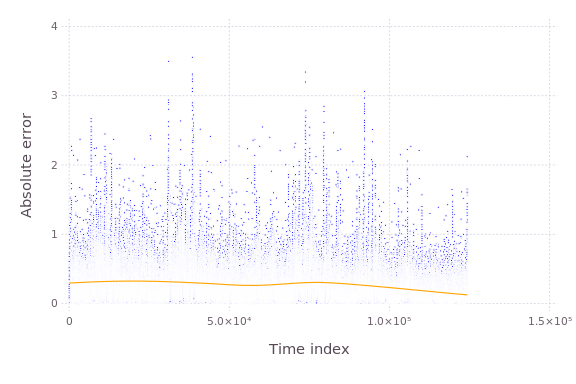

In [1]:
using Gadfly
p = Gadfly.plot(layer(x=1:124350, y=errvec, Geom.smooth, Theme(default_color="orange")),
                layer(x=1:124350, y=errvec, Geom.point, Theme(point_size=0.3mm,
                                                              default_color="blue")),
                Guide.xlabel("Time index"),
                Guide.ylabel("Absolute error"));
draw(PNG("tmp.png", 6inch, 4inch), p)

Though still not negligible, mean error hovers below 0.5.

